In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
#simple SMA function
def simple_moving_average(data, period=50, column='close'):
    return data[column].rolling(window=period,min_periods=1).mean()


In [8]:
#importing data from excel file and updating the index of dataframe
data=pd.read_excel('HINDALCO_1D.xlsx')
# Convert 'date' column to datetime format
data['datetime'] = pd.to_datetime(data['datetime'])
data.set_index('datetime',inplace=True)

In [9]:
#creating table for 50 and 100 day SMA
data['SMA_50'] = simple_moving_average(data)
data['SMA_100'] = simple_moving_average(data,period=100)


In [10]:
#creating signals
data['Signal']=np.where(data['SMA_50']>data['SMA_100'] , 1 ,0)
data['Position']=data['Signal'].diff()


In [11]:
#buy
data['buy']=np.where(data['Position']==1,data['close'],np.NAN)

#sell
data['sell']=np.where(data['Position']==-1,data['close'],np.NAN)

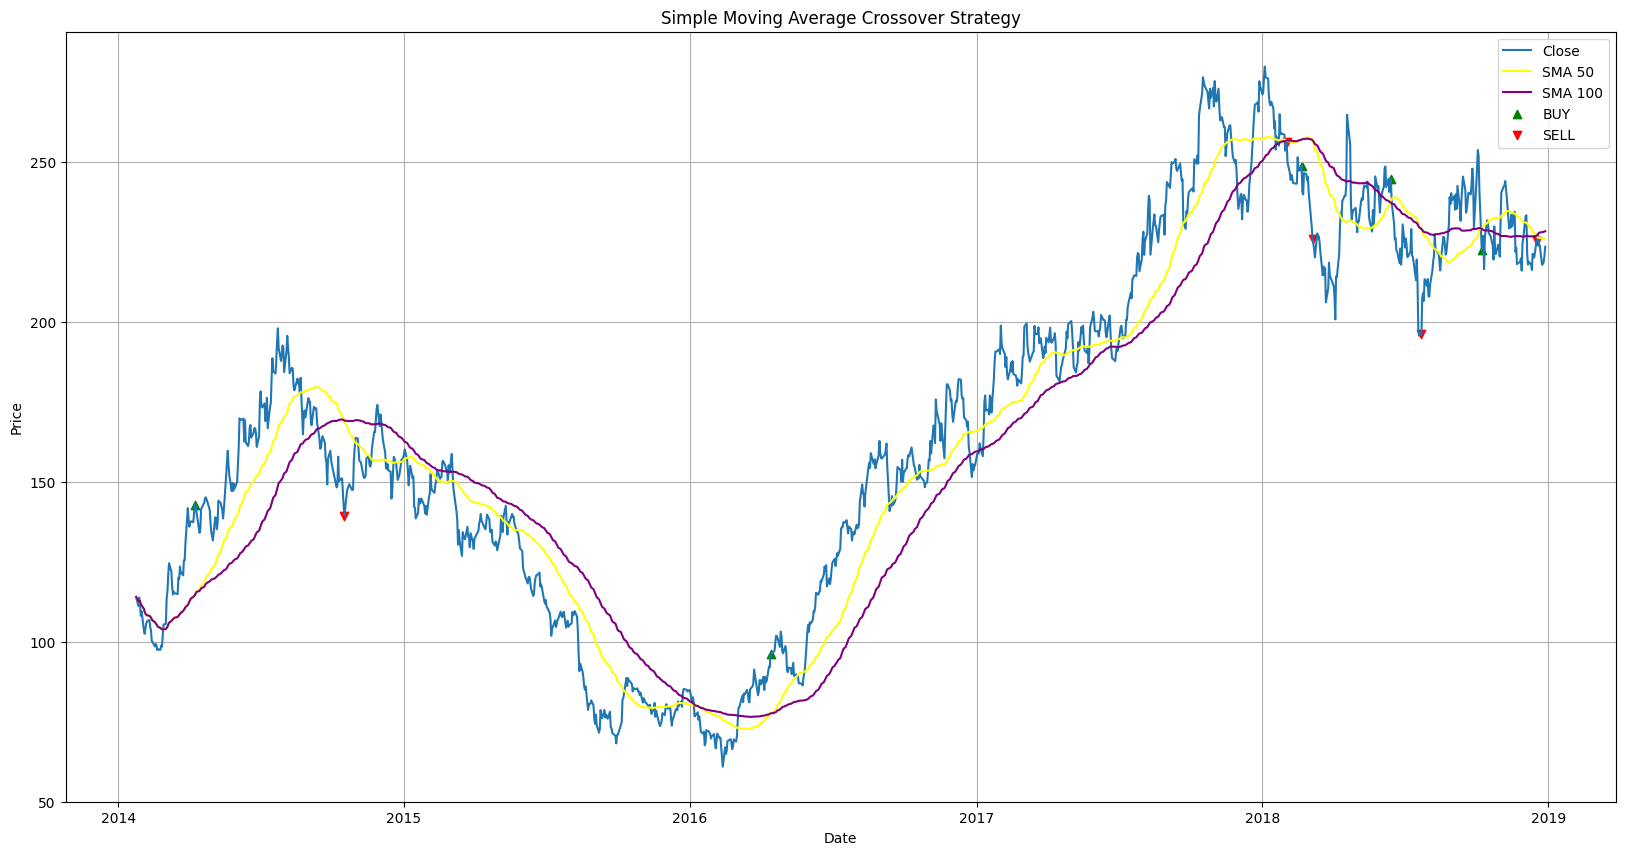

In [12]:
#plotting figure
plt.figure(figsize=(20, 10))
plt.title('Close Price History with BUY & SELL signals')
plt.plot(data['close'],label='Close')
plt.plot(data['SMA_50'],label='SMA 50',color='yellow')
plt.plot(data['SMA_100'],label='SMA 100',color='purple')
plt.scatter(data.index,data['buy'],label='BUY',marker='^',color='green')
plt.scatter(data.index,data['sell'],label='SELL',marker='v',color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Simple Moving Average Crossover Strategy')
plt.legend()
plt.grid()